In [4]:
# IMPORTING LIBRARIES 


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# OS ALLOWS TO OPERATE/INTERACT ON UNDERLYING OPERATING SYSTEM  
import os 
import cv2

#PILLOW/PIL IS THE ORIGINAL LIBRARIES FOR DEALING/PREPROCESSING  WITH IMAGES 
from PIL import Image

from tensorflow import keras 
import tensorflow.keras.layers as k 

from tqdm import tqdm 

from IPython.display import SVG

import livelossplot
plot_losses = livelossplot.PlotLossesKeras()




# DATA 

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img


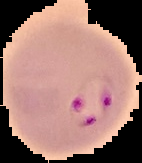

In [6]:
load_img(r'C:\Users\SNEHIL GUPTA\Malarial Cell Image Data\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png')

In [7]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)



In [8]:
image_dir = r"C:\Users\SNEHIL GUPTA\Malarial Cell Image Data\malarial_cell_image_data\cell_images"
size=64 
dataset=[]
label=[]




In [9]:
parasitized_img = os.listdir(image_dir+"\\Parasitized")


for i , img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1]=='png'):
        image = cv2.imread(image_dir + "\\Parasitized\\"+ img_name)
        image = Image.fromarray(image,'RGB')
        image= image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(0)
        
        
        

100%|███████████████████████████████████████████████████████████████████████████| 13780/13780 [00:16<00:00, 857.29it/s]


In [10]:
uninfected_img = os.listdir(image_dir+"\\Uninfected")

for i , img_name in enumerate(tqdm(uninfected_img)):
    if(img_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+"\\Uninfected\\"+img_name)
        image = Image.fromarray(image,'RGB')
        image= image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(1)
        
        

100%|███████████████████████████████████████████████████████████████████████████| 13780/13780 [00:16<00:00, 855.18it/s]


In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


xtrain,xtest,ytrain,ytest = train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=0 )

# CNN ARCHITECTURE 

In [12]:
Input_shape = (size,size,3)

inp = k.Input(shape =Input_shape)



conv1 = k.Conv2D(32,kernel_size=(3,3),activation = 'relu',padding='same')(inp)
pool1 = k.MaxPool2D(pool_size=(2,2))(conv1)
norm1 = k.BatchNormalization(axis=-1)(pool1)
drop1 = k.Dropout(rate=0.2)(norm1)



conv2 = k.Conv2D(32,kernel_size=(3,3),activation = 'relu',padding='same')(inp)
pool2 = k.MaxPool2D(pool_size=(2,2))(conv1)
norm2 = k.BatchNormalization(axis=-1)(pool1)
drop2 = k.Dropout(rate=0.2)(norm1)




conv3 = k.Conv2D(32,kernel_size=(3,3),activation = 'relu',padding='same')(inp)
pool3 = k.MaxPool2D(pool_size=(2,2))(conv1)
norm3 = k.BatchNormalization(axis=-1)(pool1)
drop3 = k.Dropout(rate=0.2)(norm1)



flat = k.Flatten()(drop3)


hidden1 = k.Dense(512,activation='relu')(flat)
norm3   = k.BatchNormalization(axis=-1)(hidden1)
drop3   = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256,activation= 'relu')(drop3)
norm4   = k.BatchNormalization(axis=-1)(hidden2)
drop4   = k.Dropout(rate=0.2)(norm4)

out     = k.Dense(2,activation='sigmoid')(drop4)





In [13]:
model = keras.Model(inputs= inp, outputs=out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0     

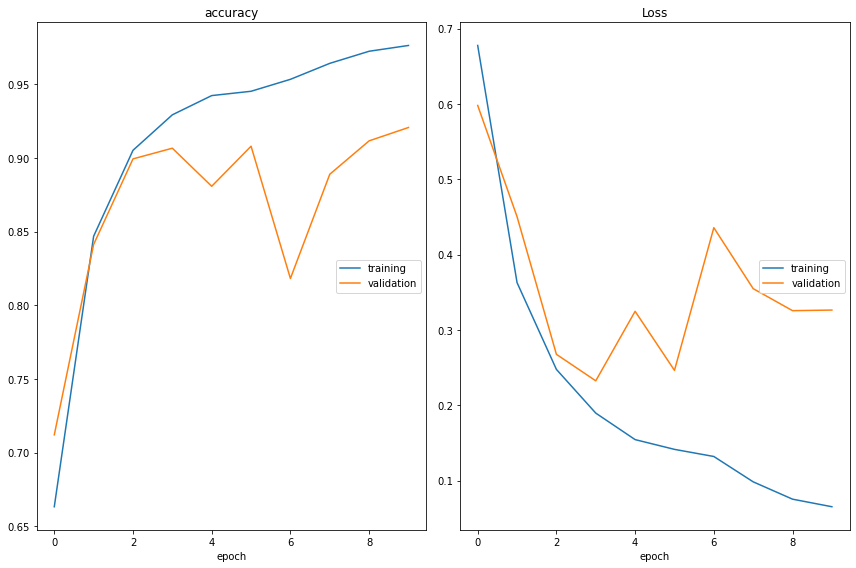

accuracy
	training         	 (min:    0.663, max:    0.976, cur:    0.976)
	validation       	 (min:    0.712, max:    0.921, cur:    0.921)
Loss
	training         	 (min:    0.065, max:    0.678, cur:    0.065)
	validation       	 (min:    0.232, max:    0.598, cur:    0.326)
311/311 [==============================] - 110s 355ms/step - loss: 0.0652 - accuracy: 0.9763 - val_loss: 0.3263 - val_accuracy: 0.9206


In [14]:
history = model.fit(np.array(xtrain),ytrain,batch_size=64,verbose=1,callbacks=[plot_losses],epochs=10,validation_split=0.1,shuffle=False)

In [15]:
print(print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100)))

173/173 [==============================] - 4s 25ms/step - loss: 0.3376 - accuracy: 0.9198
Test accuracy: 91.98%
None


In [17]:
model.save(r"C:\Users\SNEHIL GUPTA\malaria_cell_detection.h5")